## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- **Nombre:** Nicolas
- **Apellido:** Ferreyra
- **Legajo:** 1757556

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres.

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue

In [3]:
# Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [5]:
# Importo el dataset
diabetes = pd.read_csv('./ClusterAI_TP_dataset_diabetes_.csv', delimiter=',',encoding='latin-1')  # Uso PATH relativo

In [7]:
# Verifico que se haya cargado correctamente
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Verifico los tipos de datos
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Se cargo correctamente el dataframe y no es necesario ajustar el tipo de datos de las features

##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [13]:
# Dimensiones
# np.shape(diabetes)

# Imprime las dimensiones con formato. Filas x Columnas
print(str(np.shape(diabetes)[0]) + " Filas x " + str(np.shape(diabetes)[1]) +" Columnas")

768 Filas x 9 Columnas


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [15]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
# Para ver la cantidad de nulos por categoria
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No hay datos nulos en el dataframe. Se verificaron los tipos de datos de las columnas

##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

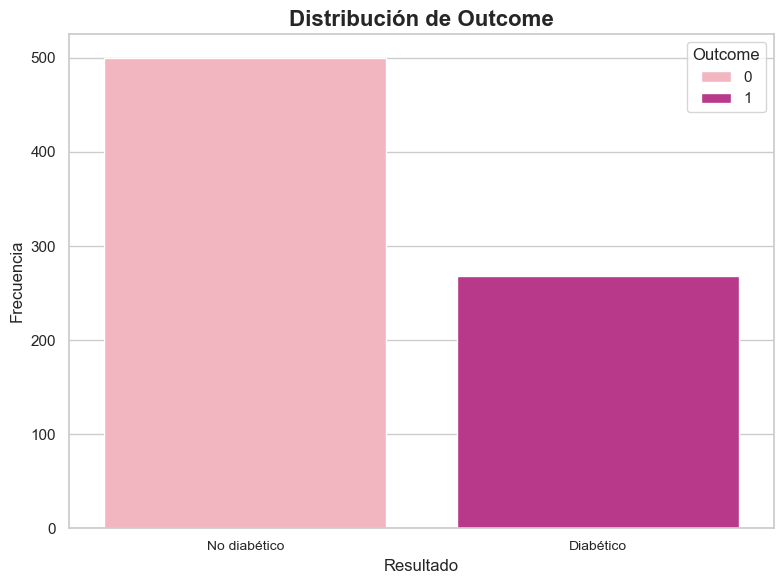

In [19]:
# Estilo de grafico
plt.figure(figsize=(8, 6))  
sns.set(style="whitegrid") 

# Countplot - Distribucion de outcome
ax = sns.countplot(x='Outcome', hue='Outcome', data=diabetes, palette="RdPu")

# Estilo de titulos y etiquetas
ax.set_title('Distribución de Outcome', fontsize=16, fontweight='bold')
ax.set_xlabel('Resultado', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.set_xticks([0, 1])  # Definir posiciones de las marcas en el eje X
ax.set_xticklabels(['No diabético', 'Diabético'], fontsize=10)

# Muestra el grafico
plt.tight_layout()
plt.show()

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros.

In [21]:
# Muestro la cantidad, promedio, desvio estandar, minimo, 25% (Q1), 50% (Q2), 75% (Q3) y maximo
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

Text(0.5, 1.03, 'Pairplot')

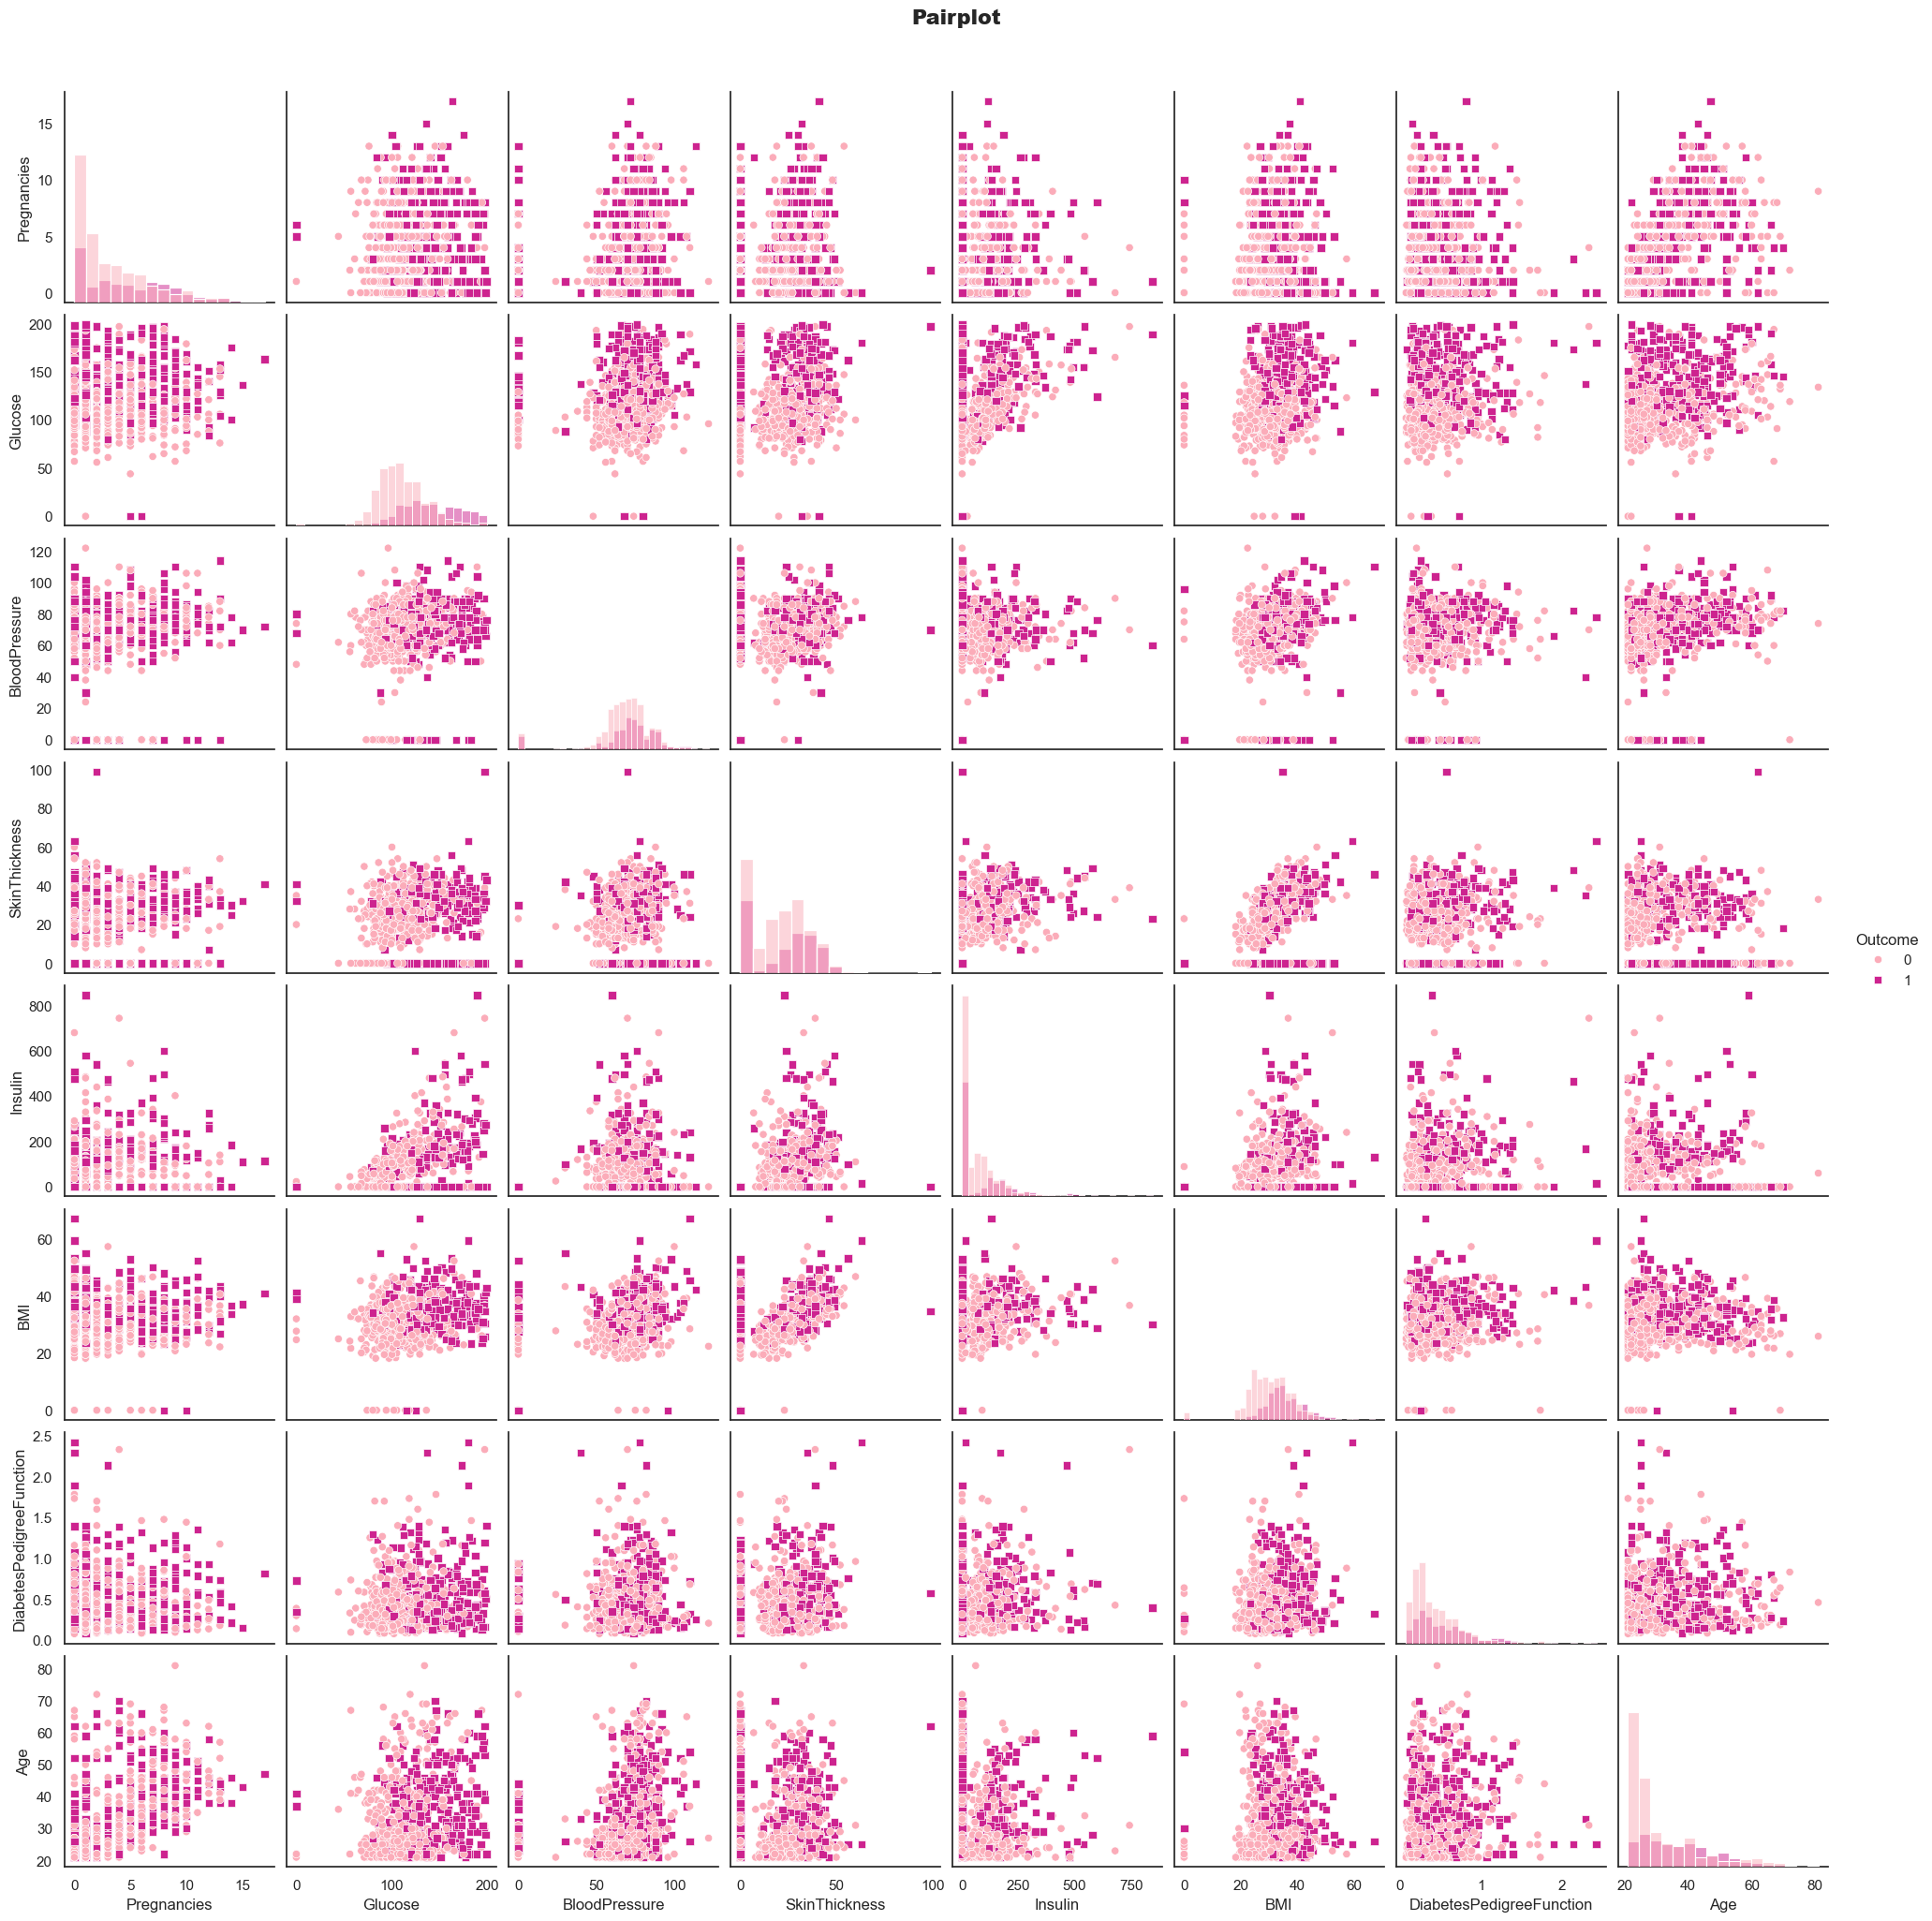

In [23]:
# Seteo de Tema
sns.set_style('white')

# Selecciono las variables a comparar con el pairplot
vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Creo el pairplot
pairplot = sns.pairplot(diabetes, hue = 'Outcome', diag_kind = 'hist', palette = 'RdPu', markers = ['o', 's'], 
                        vars = vars)

# Formato del grafico
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y = 1.03, fontsize = '16', 
                      fontfamily = 'sans-serif')

Los datos entre outcome 0 (pacientes sin diabetes) y outcome 1 (pacientes con diabetes) no son tan facilmente distinguibles como para clasificar. Sin embargo, en algunos casos se pueden sacar algunas conclusiones:
- Muchas features presentan outlyers: se observan algunos valores en 0 o fuera del IQR (inter quartile range) que no deben ser tenidas en consideracion para el analisis
- Pregnancies: no parece afectar el resultado final del diagnostico, se observan valores mezclados por lo que resulta dificil establecer una prediccion
- Glucose: a mayores niveles de glucosa se observa mayor posibilidad de ser diagnosticado con diabetes
- BloodPresure: no se observa una relacion directa para predecir el resultado
- SkinThikness: no se observa una relacion directa y facilmente distinguible
- Insulin: se ve una leve tendencia de que a mayores niveles de insulina hay mayor posibilidad de obtener un outcome 1. Sin embargo, resulta dificil generalizar ya que no es muy marcado
- BMI: a mayores niveles de BMI hay tendencia a tener diabetes
- DiabetesPedigreeFunction: se presenta una relacion lineal pero inversa en relacion a las otras features. A medida que aumenta y el de la otra feature se reduce, aumentan las posibilidades de tener diabetes
- Age: es variado, aunque hay mayor inicdencia de casos con el aumento de la edad

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas?
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

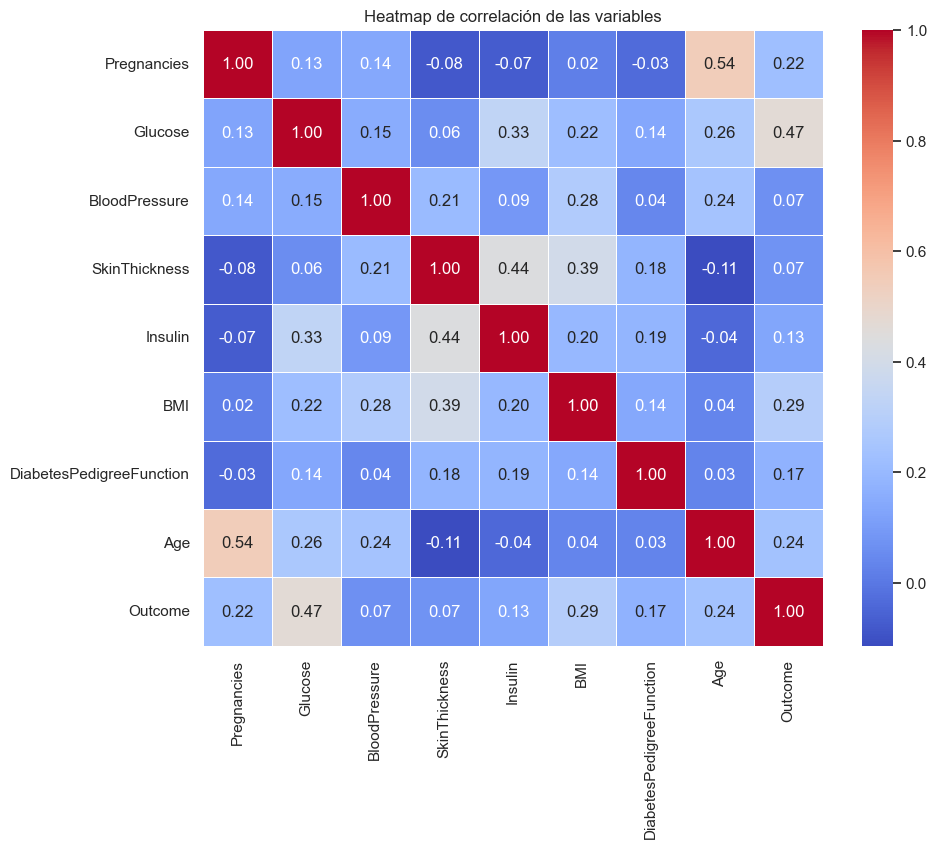

In [25]:
# Genero la matriz de correlación
correlation_matrix = diabetes.corr()

# Estilo de grafico
plt.figure(figsize=(10, 8))

# Creo el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Estilo de titulo
plt.title('Heatmap de correlación de las variables')

# Muestro el gráfico
plt.show()

En el heatmap podemos observar: 
- Fuerte relacion entre la edad (Age) y los embarazos (Pregnancies). Se obtiene un valor de correlacion de 0.54
- Alta relacion entre los niveles de glucosa (Glucose) y el resultado del diagnostico obtenido (Outcome). La relacion es de 0.47
Tambien es posible establecer una relacion entre los niveles de insulina y el espesor de la piel o el BMI y el espesor de la piel

Conociendo esta relacion de las variables se puede usar para estimar el valor de una feature cuando otra se modifica, dado que se sabe que existe una relacion entre ambas. Aplicado a este ejemplo, conociendo que entre Glucose y Outcome hay una relacion directa, en funcion al nivel medido de glucosa se puede usar para predecir cual sera el diagnostico (diabetico o no).

Tambien, en el caso de otras variables, que tengan una relacion podria significar que las 2 variables aportan informacion similar para el analisis. De esta forma, siendo que las 2 explican lo mismo, podria eliminarse una y tomar para el analisis la otra. Este podria ser el caso de Age y Pregnancies. 

##### **Objetivo 8**
Hacer un histograma de la variable BMI

<Axes: xlabel='BMI', ylabel='Count'>

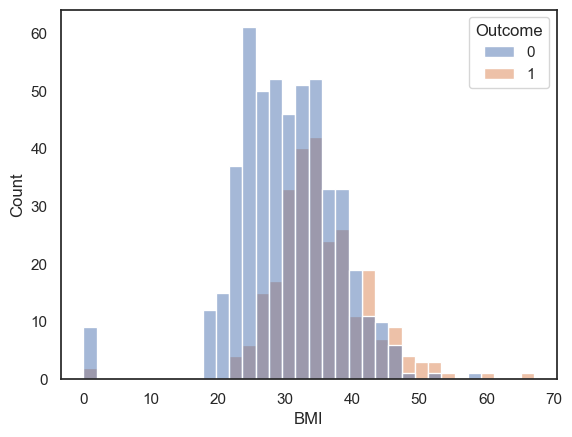

In [27]:
sns.histplot(data=diabetes, x='BMI', hue='Outcome', stat='count', edgecolor=None)

Se observan valores extranos (posibles outliers) hacia los extremos del histograma

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

<Axes: ylabel='BMI'>

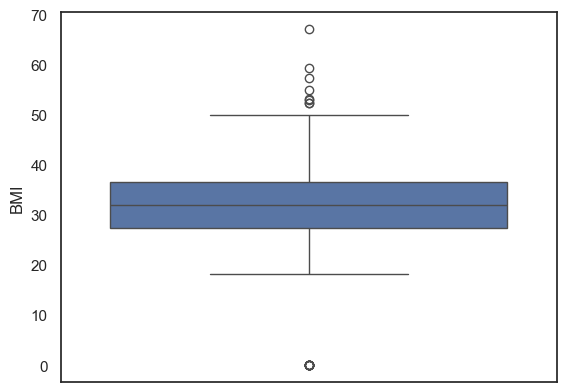

In [29]:
# Lo uso para identificar outliers de 1 variable (BMI)
sns.boxplot(y="BMI", data=diabetes)

Se confirma lo observado previamente, se presentan algunos outliers. Hay que trabajar para filtrarlos y que no afecten al analisis de datos. 

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

Para filtrar los outlyers se hace calculando el IQR

In [31]:
# Calculo el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = diabetes['BMI'].quantile(0.25)
Q3 = diabetes['BMI'].quantile(0.75)

# Calculo el inter quartile range (IQR)
IQR = Q3 - Q1

# Defino los límites inferior y superior para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
# Filtrar el dataset con el IQR
diabetes_filtered = diabetes[(diabetes['BMI'] >= lower_bound) & (diabetes['BMI'] <= upper_bound)]

In [41]:
# Comparo como me queda el nuevo dataset conformado (la cantidad de registros)
print(f"Dataset original: {len(diabetes)} filas")
print(f"Dataset sin valores atípicos: {len(diabetes_filtered)} filas")

Dataset original: 768 filas
Dataset sin valores atípicos: 749 filas


<Axes: ylabel='BMI'>

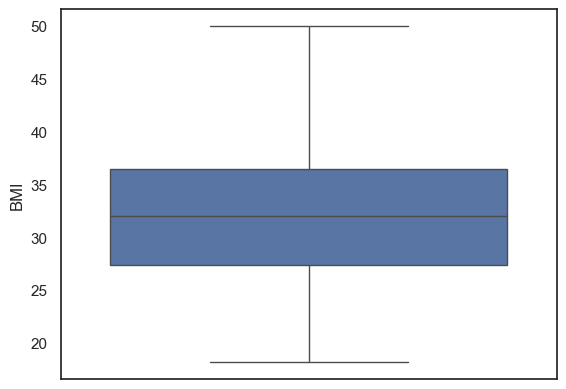

In [45]:
# Boxplot del nuevo df
sns.boxplot(y="BMI", data=diabetes_filtered)

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

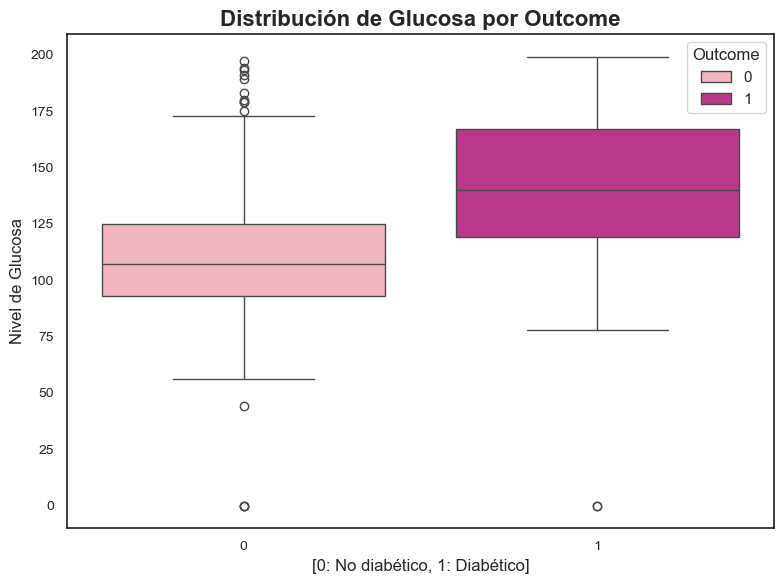

In [47]:
# Ajusta el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crea el boxplot
ax = sns.boxplot(x="Outcome", hue="Outcome", y="Glucose", data=diabetes, palette="RdPu")

# Título y etiquetas de los ejes
ax.set_title('Distribución de Glucosa por Outcome', fontsize=16, fontweight='bold')
ax.set_xlabel('[0: No diabético, 1: Diabético]', fontsize=12)
ax.set_ylabel('Nivel de Glucosa', fontsize=12)

# Ajusta el estilo del gráfico
sns.set_style("whitegrid")  
plt.xticks(fontsize=10)     
plt.yticks(fontsize=10)     

# Muestra el gráfico
plt.tight_layout() 
plt.show()

Los principales outlyers se observan para el diagnostico de pacientes No Diabeticos, quienes tienen valores elevados de glucosa pero su diagnostico es de no diabeticos.
Tambien se observan algunos valores de mediciones en 0 que deberian ser excluidas. 

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

Para un mejor analisis se eliminan los ouliers aplicando el IQR

In [49]:
# Funcion usada para eliminar
def eliminar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

In [53]:
# Elimino outliers en Glucose y BloodPressure usando el rango intercuartil (IQR)
diabetes_filtered = eliminar_outliers(diabetes, "Glucose")
diabetes_filtered = eliminar_outliers(diabetes_filtered, "BloodPressure")

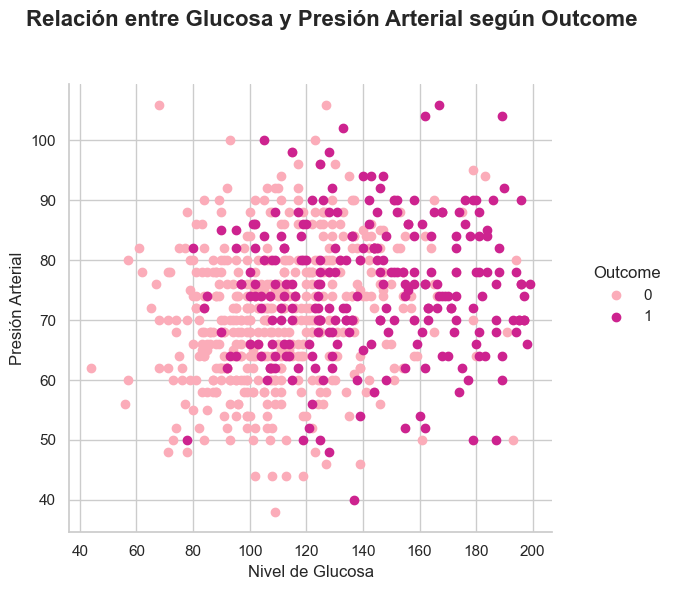

In [59]:
# Creo un scatterplot con FacetGrid
g = sns.FacetGrid(diabetes_filtered, hue="Outcome", height=6, palette="RdPu")
g.map(plt.scatter, "Glucose", "BloodPressure")

## Formato del grafico
# Leyenda
g.add_legend(title="Outcome")

# Títulos y etiquetas
g.set_axis_labels("Nivel de Glucosa", "Presión Arterial", fontsize=12)
g.fig.suptitle("Relación entre Glucosa y Presión Arterial según Outcome", fontsize=16, fontweight='bold')

# Estilo
sns.set_style("whitegrid")

# Muestro el gráfico
plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # Dejo espacio para la leyenda a la derecha
plt.show()


Los valores de presion arterial no parecen modificar el resultado del outcome. En cambio, los valores de glucosa si, siendo a mayores niveles de glucosa mayor posibilidad de tener diabetes. 
No es muy clara la definicion para poder clasificar en funcion a estos features

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [61]:
# Creo una columna 'Rango_Edad'. La valores se construyen a partir de la variable 'Age'
diabetes['AgeRange'] = pd.cut(diabetes['Age'],
                            bins=[0, 30, 40, float('inf')],
                            labels=['<30', '30-40', '>40'])

# Muesto las primeras filas  del df para verificar el resultado. Solo tomo Age y AgeRange
print(diabetes[['Age', 'AgeRange']].head())

   Age AgeRange
0   50      >40
1   31    30-40
2   32    30-40
3   21      <30
4   33    30-40


In [65]:
# Verifico como queda el df con la nueva columna
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeRange
0,6,148,72,35,0,33.6,0.627,50,1,>40
1,1,85,66,29,0,26.6,0.351,31,0,30-40
2,8,183,64,0,0,23.3,0.672,32,1,30-40
3,1,89,66,23,94,28.1,0.167,21,0,<30
4,0,137,40,35,168,43.1,2.288,33,1,30-40


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

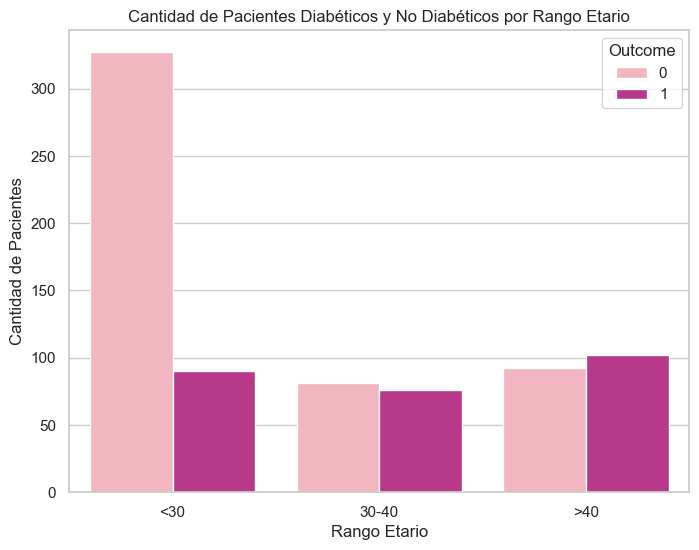

In [69]:
# Creo el count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeRange', hue='Outcome', data=diabetes, palette='RdPu')

# Estilo: Título y etiquetas
plt.title('Cantidad de Pacientes Diabéticos y No Diabéticos por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Pacientes')

# Muestra el gráfico
plt.show()

Queda reflejado como a medida que aumenta la edad, mayor es la cantidad de pacientes con diabetes. Los de la categoria menor a 30 años, en %, son los de menor numero de pacientes con diabetes. 

In [71]:
# Calcula los % de diabetes que representa en cada grupo de edades
# Calcula el total de pacientes por cada rango de edad
total_por_rango = diabetes.groupby('AgeRange', observed=True)['Outcome'].count().reset_index()

# Calcular la cantidad de Outcome = 1 por cada rango de edad
diabeticos_por_rango = diabetes[diabetes['Outcome'] == 1].groupby('AgeRange', observed=True)['Outcome'].count().reset_index()

# Unir ambos DataFrames en base al rango de edad
df_porcentaje = pd.merge(diabeticos_por_rango, total_por_rango, on='AgeRange', suffixes=('_Diabeticos', '_Total'))

# Calcular el porcentaje de Outcome = 1 sobre el total de pacientes por rango
df_porcentaje['Porcentaje_Diabeticos'] = (df_porcentaje['Outcome_Diabeticos'] / df_porcentaje['Outcome_Total']) * 100

# Renombrar columnas para que sea más claro
df_porcentaje = df_porcentaje.rename(columns={'Outcome_Diabeticos': 'Cantidad_Diabeticos', 'Outcome_Total': 'Total_Pacientes'})

# Mostrar el resultado
print(df_porcentaje[['AgeRange', 'Cantidad_Diabeticos', 'Total_Pacientes', 'Porcentaje_Diabeticos']])


  AgeRange  Cantidad_Diabeticos  Total_Pacientes  Porcentaje_Diabeticos
0      <30                   90              417              21.582734
1    30-40                   76              157              48.407643
2      >40                  102              194              52.577320


La incidencia de diabetes para las mersonas mas jovenes es mucho menor comparado con aquellos de 30 a mas años. 

**-----------------------------------------------------------------   Fin   -----------------------------------------------------------------------**